<a href="https://colab.research.google.com/github/aayushrai/NLP/blob/master/Tensorflow/6_word_embedding_on_sarcasm_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import numpy as np

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-06-15 19:45:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-06-15 19:45:20 (108 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
with open("/tmp/sarcasm.json","r") as f:
    data = json.load(f)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
sentences = []
labels =[]

for element in data:
   sentences.append(element["headline"])
   labels.append(element["is_sarcastic"])

In [0]:
vocab_size = 5000
oov = "<OOV>"
embedding_dim = 15
max_length = 200
epoch = 20
truncate = "post"
pad_type = "post"
training_size = int(len(sentences)*0.75) # taking 75% training data of total size of dataset and remeaning 30% for testing

In [0]:
training_data = sentences[:training_size]
training_labels = labels[:training_size]
test_data = sentences[training_size:]
test_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov)
tokenizer.fit_on_texts(training_data)

#bword to index dis
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_data)
training_pad_sequeces = pad_sequences(training_sequences,maxlen=max_length,truncating=truncate)

test_sequences = tokenizer.texts_to_sequences(test_data)
test_pad_sequeces = pad_sequences(test_sequences,maxlen=max_length,truncating=truncate)

In [0]:
test_pad_sequeces = np.array(test_pad_sequeces)
training_pad_sequeces = np.array(training_pad_sequeces)

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

In [0]:
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(24,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")                        
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 15)           75000     
_________________________________________________________________
global_average_pooling1d_5 ( (None, 15)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                384       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 75,409
Trainable params: 75,409
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(training_pad_sequeces,training_labels,epochs=epoch,verbose=2,validation_data=(test_pad_sequeces,test_labels))

Epoch 1/20
626/626 - 3s - loss: 0.6832 - accuracy: 0.5602 - val_loss: 0.6746 - val_accuracy: 0.5635
Epoch 2/20
626/626 - 3s - loss: 0.6128 - accuracy: 0.6558 - val_loss: 0.5295 - val_accuracy: 0.7966
Epoch 3/20
626/626 - 3s - loss: 0.4294 - accuracy: 0.8277 - val_loss: 0.4064 - val_accuracy: 0.8303
Epoch 4/20
626/626 - 3s - loss: 0.3548 - accuracy: 0.8550 - val_loss: 0.3788 - val_accuracy: 0.8384
Epoch 5/20
626/626 - 3s - loss: 0.3183 - accuracy: 0.8716 - val_loss: 0.3661 - val_accuracy: 0.8453
Epoch 6/20
626/626 - 3s - loss: 0.2947 - accuracy: 0.8806 - val_loss: 0.3588 - val_accuracy: 0.8485
Epoch 7/20
626/626 - 3s - loss: 0.2753 - accuracy: 0.8883 - val_loss: 0.3544 - val_accuracy: 0.8480
Epoch 8/20
626/626 - 3s - loss: 0.2617 - accuracy: 0.8943 - val_loss: 0.3575 - val_accuracy: 0.8458
Epoch 9/20
626/626 - 3s - loss: 0.2482 - accuracy: 0.9002 - val_loss: 0.3559 - val_accuracy: 0.8485
Epoch 10/20
626/626 - 3s - loss: 0.2393 - accuracy: 0.9043 - val_loss: 0.3764 - val_accuracy: 0.8359

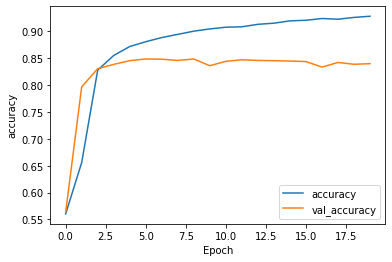

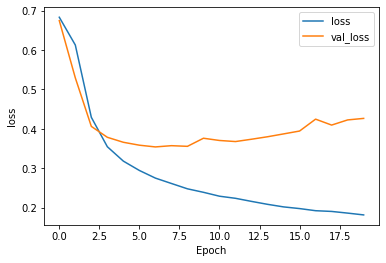

In [0]:
import matplotlib.pyplot as plt

def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epoch")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()

plot_graph(history,"accuracy")
plot_graph(history,"loss")